In [1]:
import shapely.geometry as sgeom
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
import cartopy.feature as cfeature
import matplotlib.colors as clrs
from datetime import datetime,date
import datetime



#obtain list of geometries and boroughs from shapefile
geom=[]
district=[]
reader = Reader(r"C:\Users\con74781\Desktop\Digital Projects\Python corona virus project\UK map with districts\GBR_adm2.shp")
boroughs = reader.records()

for i in range(len(reader)):
    geom.append(next(boroughs).geometry)                 
        
boroughs = reader.records()
for i in range(len(reader)):
    district.append(next(boroughs).attributes["NAME_2"])
   




 # find from excel sheet and put GOV districts in list GOV_boroughs_list
import xlrd

District_filepath= r"C:\Users\con74781\Desktop\Digital Projects\Python corona virus project\UK regions from public health.xlsx"
wb=xlrd.open_workbook(District_filepath)
sheet=wb.sheet_by_index(0)

GOV_boroughs_list_EN=[]
GOV_boroughs=[]
temp_alpha_list=[]


#obtain list of boroughs in ENGLAND
for i in range(2,114): # column 4 in district sheet and start at row 2
    GOV_boroughs_str = sheet.cell_value(i,4) # column no.4
    for letter in GOV_boroughs_str:   
        if i in [8,11,41,49,78,89,92,93]:
            GOV_boroughs.append(GOV_boroughs_str)
            break  
        elif letter.isalpha() or letter=="." or letter==" " and len(temp_alpha_list)>1:
            temp_alpha_list.append(letter)
        elif letter==",":
            GOV_boroughs.append("".join(temp_alpha_list))
            temp_alpha_list=[]
    GOV_boroughs_list_EN.append(GOV_boroughs)
    GOV_boroughs=[]


GOV_boroughs_list_SC=[]
temp_alpha_list=[]  
#obtain list of boroughs in SCOTLAND
for i in range(162,176): # column 4 in district sheet and start at row 162
    GOV_boroughs_str = sheet.cell_value(i,4) # column no.4
    for letter in GOV_boroughs_str:   
        if letter.isalpha() or letter==" " and len(temp_alpha_list)>1:
            temp_alpha_list.append(letter)
        elif letter==",":
            GOV_boroughs.append("".join(temp_alpha_list))
            temp_alpha_list=[]
    GOV_boroughs_list_SC.append(GOV_boroughs)
    GOV_boroughs=[]    
    
    
    
    


#create dictionary to hold GOV_boroughs_list and total no. of cases in all boroughs for ENGLAND
#source of ENGLAND figures https://coronavirus.data.gov.uk/?_ga=2.158074239.492950272.1588090950-1306177147.1587672434
import csv
import math

csv_row=[]
with open(r'C:\Users\con74781\Downloads\coronavirus-cases_latest.csv','rt') as f:
    data = csv.reader(f)
    for row in data:
        csv_row.append(row)

total_infections=0
Dict_boroughs_EN = {}
borghs=0
allregions_inf=0

for sublist in GOV_boroughs_list_EN:
    for entry in sublist:        
        for i in range(len(csv_row)):
            if entry == csv_row[i][0] and (csv_row[i][3]=='2020-06-07'): # check for data in particular date (yyyy-mm-dd)
                total_infections+=int(csv_row[i][7])               
                break
    if borghs == 6:
        total_infections//=2
    elif borghs == 76:
        total_infections=math.ceil(total_infections/2)
    Dict_boroughs_EN["Boroughs_"+str(borghs)]= (GOV_boroughs_list_EN[borghs], "Total infections:",total_infections,
                                                "Shapefile name:" , district[borghs],'geometries',geom[borghs])
    borghs+=1
    allregions_inf+=total_infections
    total_infections=0


#create dictionary to hold GOV_boroughs_list and total no. of cases in all boroughs for SCOTLAND
# source of SCOTLAND figures   https://www.gov.scot/publications/trends-in-number-of-people-in-hospital-with-confirmed-or-suspected-covid-19/  
Dict_boroughs_SC = {}

Virus_cases_SC_file= r"C:\Users\con74781\Downloads\COVID-19+data+by+NHS+Board+9+June+2020.xlsx"
wb_SC=xlrd.open_workbook(Virus_cases_SC_file)
sheet_SC=wb_SC.sheet_by_index(2)


geom_SC=[]
geom_SC_temp=[]
for sublist in GOV_boroughs_list_SC:
    for entry in sublist:
        for i in range(140,172):
            if entry == sheet.cell_value(i,2):
                geom_SC_temp.append(geom[i-2])
                break
    geom_SC.append(geom_SC_temp) 
    geom_SC_temp=[]

#find data for a given date  

d1 = date(2020, 6, 7) # insert here the date for when data is requested (yyyy,m,d)
d0 = date(1900,1,1)
delta = d1 - d0
days=int(delta.days)+2


for i in range(3,sheet_SC.nrows):
    if sheet_SC.cell_value(i,0)==days:
        date_pos=i
        break
   
    
borghs=0   
for i in range(162,176):
    for j in range (0,sheet_SC.ncols-1):
        if (sheet.cell_value(i,3) == sheet_SC.cell_value(2,j)):
            if (sheet_SC.cell_value(date_pos,j)=='*'):
                total_infections=5
            else:
                total_infections=int(sheet_SC.cell_value(date_pos,j))
            break   
    Dict_boroughs_SC["Boroughs_"+str(borghs)]= (GOV_boroughs_list_SC[borghs],"TOTAL INFECTIONS:",
                                                total_infections,"GOV_BOROUGHS_NAME:" ,sheet.cell_value(i,3),"geometries:", geom_SC[borghs] )
    borghs+=1
    

    
#create dictionary to hold GOV_boroughs_list and total no. of cases in all boroughs for NORTHERN IRELAND
# source of NI figures   "https://www.health-ni.gov.uk/" 



total_infections=4798  # manually inputed until official data are released for download
Dict_boroughs_NI={}
GOV_boroughs_list_NI=[]
geom_NI=[]
for i in range(114,140):
    GOV_boroughs_list_NI.append(sheet.cell_value(i,2))
    geom_NI.append(geom[i-2])
Dict_boroughs_NI["Boroughs"]=(GOV_boroughs_list_NI, "Total Infections:", total_infections, "geometries:", geom_NI)

    
#create dictionary to hold GOV_boroughs_list and total no. of cases in all boroughs for WALES
# source of WALES figures   https://public.tableau.com/profile/public.health.wales.health.protection#!/vizhome/RapidCOVID-19virology-Public/Headlinesummary

Wales_data_path= r"C:\Users\con74781\Downloads\Rapid COVID-19 surveillance data.xlsx"
wb_WA=xlrd.open_workbook(Wales_data_path)
sheet_WA=wb_WA.sheet_by_index(2)


GOV_boroughs_list_WA=[]
Dict_boroughs_WA={}


for i in range (172,194):
    GOV_boroughs_list_WA.append(sheet.cell_value(i,6))
    
    
# find data for a selected date    
    
d1 = date(2020, 6, 7) # insert here the date for when data is requested (yyyy,m,d)
d0 = date(1900,1,1)
delta = d1 - d0
days=int(delta.days)+2


borghs=0
for entry in GOV_boroughs_list_WA:
    for j in range(0,sheet_WA.nrows-1):
        if (entry == sheet_WA.cell_value(j,0)) and (sheet_WA.cell_value(j,1)==days): # check for particular date to get data
            total_infections= int(sheet_WA.cell_value(j,3))
            break
    Dict_boroughs_WA["Boroughs_"+str(borghs)]=(GOV_boroughs_list_WA[borghs], "Total infections:", total_infections, "geomtries:", geom[borghs+170])
    borghs+=1
    

    
# find the highest figure of infection in the Dictionary boroughs.
# This to be used to set the map colour range  
highest_inf = Dict_boroughs_EN["Boroughs_0"][2]
highest_inf_geom = Dict_boroughs_EN['Boroughs_0'][6]
cntr=0

for entry in Dict_boroughs_EN:
    if Dict_boroughs_EN["Boroughs_"+str(cntr)][2] > highest_inf:
        highest_inf = Dict_boroughs_EN["Boroughs_"+str(cntr)][2]
        highest_inf_borough=Dict_boroughs_EN["Boroughs_"+str(cntr)][4]
        highest_inf_geom = Dict_boroughs_EN["Boroughs_"+str(cntr)][6]
        
    cntr+=1
    
cntr=0
for entry in Dict_boroughs_SC:
    if Dict_boroughs_SC["Boroughs_"+str(cntr)][2] > highest_inf:
        highest_inf = Dict_boroughs_SC["Boroughs_"+str(cntr)][2]
        highest_inf_borough=Dict_boroughs_SC["Boroughs_"+str(cntr)][4]
        highest_inf_geom = Dict_boroughs_SC["Boroughs_"+str(cntr)][6]
    cntr+=1

    
if Dict_boroughs_NI["Boroughs"][2] > highest_inf:
    highest_inf=Dict_boroughs_NI["Boroughs"][2]
    highest_inf_borough='Northern Ireland all districts '
    highest_inf_geom = Dict_boroughs_NI["Boroughs"][4]
    
cntr=0    
for entry in Dict_boroughs_WA:
    if Dict_boroughs_WA["Boroughs_"+str(cntr)][2] > highest_inf:
        highest_inf = Dict_boroughs_WA["Boroughs_"+str(cntr)][0]
        highest_inf_borough=Dict_boroughs_WA["Boroughs_"+str(cntr)][0]
        highest_inf_geom = Dict_boroughs_WA["Boroughs_"+str(cntr)][4]
        
    cntr+=1



    
# append gometries from SCOTLAND, ENGLAND, NORTHERN IRELAND, WALES in the colouring lists
col1=[];col2=[];col3=[];col4=[];
col1_n_dist=0; col2_n_dist=0; col3_n_dist=0; col4_n_dist=0;

for i in range(len(Dict_boroughs_EN)):
    if Dict_boroughs_EN["Boroughs_"+str(i)][2] > (0.6*highest_inf):
        col1.append(geom[i])
        col1_n_dist+=1
    elif (0.6*highest_inf) >= Dict_boroughs_EN["Boroughs_"+str(i)][2] > (0.35*highest_inf):
        col2.append(geom[i])
        col2_n_dist+=1
    elif (0.35*highest_inf) >= Dict_boroughs_EN["Boroughs_"+str(i)][2] > (0.15*highest_inf):
        col3.append(geom[i])
        col3_n_dist+=1
    else:
        col4.append(geom[i])
        col4_n_dist+=1
        
        
        
for i in range(len(Dict_boroughs_SC)):
    if Dict_boroughs_SC["Boroughs_"+str(i)][2] > (0.6*highest_inf):
        for entry in Dict_boroughs_SC["Boroughs_"+str(i)][6]:
            col1.append(entry)
            col1_n_dist+=1
    elif (0.6*highest_inf) >= Dict_boroughs_SC["Boroughs_"+str(i)][2] > (0.35*highest_inf):
        for entry in Dict_boroughs_SC["Boroughs_"+str(i)][6]:
            col2.append(entry)
            col2_n_dist+=1
    elif (0.35*highest_inf) >= Dict_boroughs_SC["Boroughs_"+str(i)][2] > (0.15*highest_inf):
        for entry in Dict_boroughs_SC["Boroughs_"+str(i)][6]:
            col3.append(entry)
            col3_n_dist+=1
    else:
        for entry in Dict_boroughs_SC["Boroughs_"+str(i)][6]:
            col4.append(entry)
            col4_n_dist+=1
            
if Dict_boroughs_NI["Boroughs"][2]>(0.6*highest_inf):
    for entry in Dict_boroughs_NI["Boroughs"][4]:
        col1.append(entry)
        col1_n_dist+=1
elif (0.6*highest_inf)>= Dict_boroughs_NI["Boroughs"][2] > (0.35*highest_inf):
    for entry in Dict_boroughs_NI["Boroughs"][4]:
        col2.append(entry)
        col2_n_dist+=1
elif (0.35*highest_inf)>= Dict_boroughs_NI["Boroughs"][2] > (0.15*highest_inf):
    for entry in Dict_boroughs_NI["Boroughs"][4]:
        col3.append(entry)
        col3_n_dist+=1
else:
    for entry in Dict_boroughs_NI["Boroughs"][4]:
        col4.append(entry)
        col4_n_dist+=1
        
for i in range(len(Dict_boroughs_WA)):
    if Dict_boroughs_WA["Boroughs_"+str(i)][2] > (0.6*highest_inf):
        col1.append(Dict_boroughs_WA["Boroughs_"+str(i)][4])
        col1_n_dist+=1
    elif (0.6*highest_inf) >= Dict_boroughs_WA["Boroughs_"+str(i)][2] > (0.35*highest_inf):
        col2.append(Dict_boroughs_WA["Boroughs_"+str(i)][4])
        col2_n_dist+=1
    elif (0.35*highest_inf) >= Dict_boroughs_WA["Boroughs_"+str(i)][2] > (0.15*highest_inf):
        col3.append(Dict_boroughs_WA["Boroughs_"+str(i)][4])
        col3_n_dist+=1
    else:
        col4.append(Dict_boroughs_WA["Boroughs_"+str(i)][4])
        col4_n_dist+=1
    

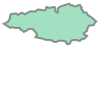

In [4]:
geom[57] 

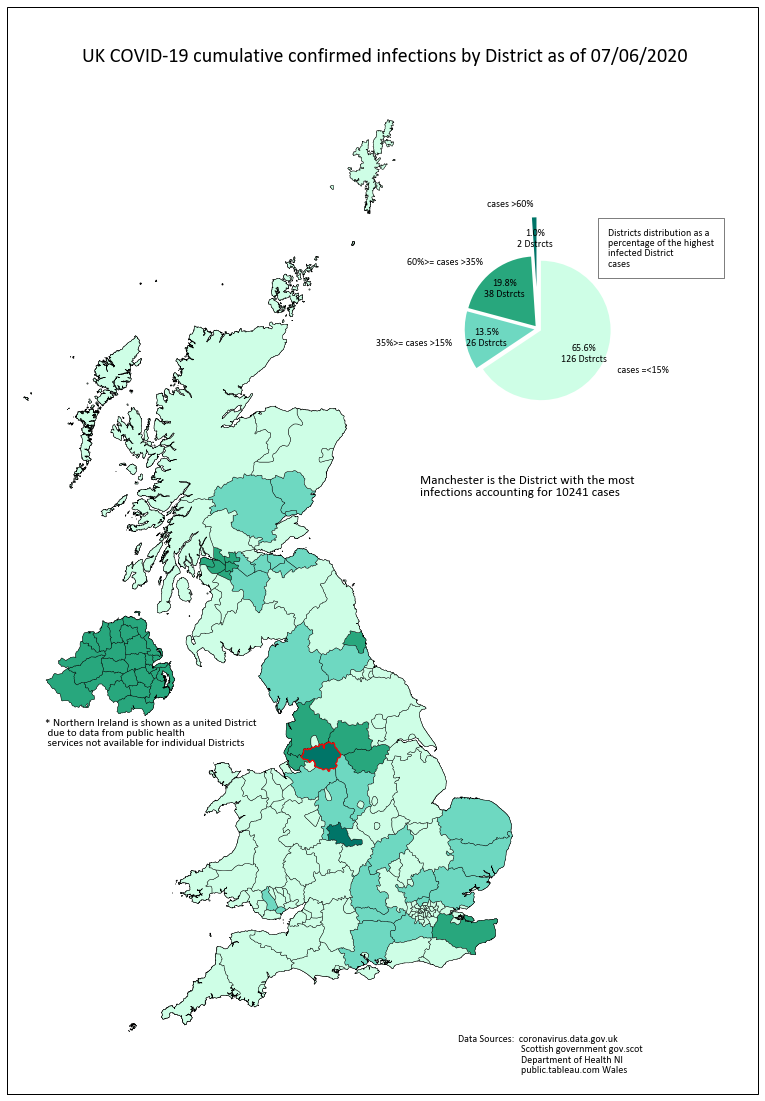

In [399]:
#plot the map of COVID-19 infection cases
fig = plt.figure(figsize=(20,20))
ax=plt.axes(projection=ccrs.Mercator())
ax.set_extent([-9, 7, 49, 62])

ax.add_geometries(reader.geometries() ,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=(1,0.960784,0.901960))
ax.add_geometries(col1,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=(0.0004,0.458823,0.407843))
ax.add_geometries(col2,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=(0.156862,0.654901,0.490196)) 
ax.add_geometries(col3,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=(0.431372,0.847058,0.756862)) 
ax.add_geometries(col4,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=(0.807843,0.996078,0.901960)) 
ax.add_geometries(highest_inf_geom, ccrs.PlateCarree(),edgecolor='red',linewidth=1.2,facecolor=(0.0004,0.458823,0.407843) )

date_now = (datetime.datetime.now()).strftime("%x")
plt.text(0.1, 0.95, 'UK COVID-19 cumulative confirmed infections by District as of 07/06/2020', fontname='Calibri',
         fontsize=20,transform=ax.transAxes)
plt.text(0.05, 0.32, """* Northern Ireland is shown as a united District\n due to data from public health\n services not available for individual Districts""" ,
         fontname='Calibri',fontsize=11, transform=ax.transAxes)
plt.text(0.55,0.55,"{0} is the District with the most\ninfections accounting for {1} cases".format(highest_inf_borough,highest_inf),
         fontname='Calibri',fontsize=13, transform=ax.transAxes )
date_now = (datetime.datetime.now()).strftime("%x")
plt.text(0.6, 0.01, """Data Sources:  coronavirus.data.gov.uk
                            Scottish government gov.scot
                            Department of Health NI
                            public.tableau.com Wales
""",fontname='Calibri', fontsize=10,transform=ax.transAxes)




#Create legend

ax1 = plt.axes([0.55, 0.6, 0.14, 0.14])
labels = ['cases >60%', '60%>= cases >35%','35%>= cases >15%',' cases =<15%']
n_dist_list=[col1_n_dist,col2_n_dist,col3_n_dist,col4_n_dist]
explode = (0.6, 0.05, 0.05, 0.05) 
colors=((0.0004,0.458823,0.407843),(0.156862,0.654901,0.490196),(0.431372,0.847058,0.756862),(0.807843,0.996078,0.901960)) 
colors=clrs.to_rgba_array(colors)

def make_autopct(n_dist_list):
    def my_autopct(pct):        
        
        val = int((pct*192/100))
        return '{0:1.1f}%\n{1:d} Dstrcts'.format(pct,val)
    return my_autopct

ax1.pie(n_dist_list, explode=explode,colors=colors,pctdistance=0.7,labels=labels,autopct=make_autopct(n_dist_list),
        radius=1,startangle=90, textprops=dict(fontname='Calibri',fontsize=10,color="black"),labeldistance=1.2)

ax1.axis('equal') 
ax1.text(1,0.9, 'Districts distribution as a\npercentage of the highest\ninfected District\ncases ', fontname='Calibri',
         color='black',bbox=dict(facecolor='none',linewidth= '0.5', edgecolor='black', boxstyle='square,pad=1'))



plt.savefig(fname=r"C:\Users\con74781\Desktop\Digital Projects\Python corona virus project\UK_map_infections", dpi=200)
plt.show()
  
    

In [9]:
import requests 
from bs4 import BeautifulSoup

#Create Dictionaries for population density SCOTLAND 
# source       https://www.nrscotland.gov.uk/statistics-and-data/statistics/statistics-by-theme/population/population-estimates/mid-year-population-estimates/mid-2019

SC_density_data_path= r"C:\Users\con74781\Downloads\mid-year-pop-est-19-data.xlsx"
wb_SC_den=xlrd.open_workbook(SC_density_data_path)
sheet_SC_den=wb_SC_den.sheet_by_index(9)


Dict_SC_density={}

cntr=0
for i in range (41,55):
    Dict_SC_density["County_Density_"+str(cntr)]=(GOV_boroughs_list_SC[cntr], "GOV_BOROUGHS_NAME:", Dict_boroughs_SC["Boroughs_"+str(cntr)][4],
                                                  "Population_Density:", round(sheet_SC_den.cell_value(i,4)),
                                                 "geometries:",Dict_boroughs_SC["Boroughs_"+str(cntr)][6])
    cntr+=1

    
    
# Create Dictionaries for population density WALES
# source   https://statswales.gov.wales/Catalogue/Population-and-Migration/Population/Density/populationdensity-by-localauthority-year
link_WA_Density = r"https://statswales.gov.wales/Catalogue/Population-and-Migration/Population/Density/populationdensity-by-localauthority-year"

page=requests.get(link_WA_Density)
soup = BeautifulSoup(page.text, 'html.parser')
contents_den = soup.find(class_='dxpgControl').find_all(class_="dxpgCell")[10:]
contents_dis = soup.find(class_='dxpgMainTable').find_all('td', class_='dxpgRowFieldValue')[2:]


WA_densities=[]
numbers=[]
for i in range(10,len(contents_den)+1,10):
    entry=str(contents_den[i-1])
    for char in entry:
        if char in '0123456789.':
            numbers.append(char)
    WA_densities.append("".join(numbers[1:]))
    numbers=[]
    
WA_densities=[round(float(x)) for x in WA_densities]

WA_districts_online=[]
WA_districts_online = [str(x) for x in contents_dis]  
WA_districts_online = [x[63:-12] for x in WA_districts_online]  
WA_districts_online[8:] = [ x[1:] for x in WA_districts_online[8:]]  

Dict_WA_density={}
cntr=0
cn=0
for i in range(0,len(Dict_boroughs_WA)):
    for x in range(0,len(WA_districts_online)): 
        if WA_districts_online[cntr] == Dict_boroughs_WA["Boroughs_"+str(cn)][0]:
            Dict_WA_density["County_Density_"+str(cn)]=(WA_districts_online[cntr],"Population_Density:",
                                                        round(WA_densities[cntr]),"geometries:",Dict_boroughs_WA["Boroughs_"+str(cn)][4])
            cntr=0                                           
            break
        else: 
            cntr+=1 
    cn+=1


    
# Create Dictionaries for population density NORTHERN IRELAND
# source https://www.nisra.gov.uk/publications/2018-mid-year-population-estimates-northern-ireland#skip-link
NI_density_data_path= r"C:\Users\con74781\Downloads\MYE18_POP_DENSITIES.xlsx"
wb_NI_den=xlrd.open_workbook(NI_density_data_path)
sheet_NI_den=wb_NI_den.sheet_by_index(1)
Dict_NI_density={}

cn=0
for i in range(0,26):
    for row in range(0,sheet_NI_den.nrows):
        if sheet_NI_den.cell_value(row,0)[:1] == '5' and sheet_NI_den.cell_value(row,2)== Dict_boroughs_NI["Boroughs"][0][cn] and sheet_NI_den.cell_value(row,3) == 2018:
            Dict_NI_density["County_Density_"+str(cn)]=(Dict_boroughs_NI["Boroughs"][0][cn], "Population_Density:",
                                                       round(sheet_NI_den.cell_value(row,4)), "geometries:",Dict_boroughs_NI["Boroughs"][4][cn])
            cn+=1    
            break


# Create Dictionaries for population density ENGLAND
# source https://www.ons.gov.uk/
EN_density_data_path= r"C:\Users\con74781\Desktop\Digital Projects\Python corona virus project\Population density England.xlsx"
wb_EN_den=xlrd.open_workbook(EN_density_data_path)
sheet_EN_den=wb_EN_den.sheet_by_index(0)
Dict_EN_density={}


temp_borghs=[]
cn=0

for i in range(1,113):
    x=sheet_EN_den.cell_value(i,4)
    if isinstance(x,str):
        xsplit=x.split(",")
        for entry in xsplit:
            temp_borghs.append(sheet_EN_den.cell_value(int(entry)-1,2))
        Dict_EN_density["County_Density_"+str(cn)]= (sheet_EN_den.cell_value(i,1), "GOV_names:", temp_borghs, 
                                                         "Population Density:",int(sheet_EN_den.cell_value(i,5)), "geometries:", geom[i-1])
        temp_borghs=[]
    else:
        Dict_EN_density["County_Density_"+str(cn)]= (sheet_EN_den.cell_value(i,1),
                                                     "Population Density:",int(sheet_EN_den.cell_value(i,5)), "geometries:", geom[i-1])
    cn+=1         
            
            
        

In [10]:


#Create colouring columns
col11=[]; col12=[]; col13=[]; col14=[]; col15=[];col16=[]; col17=[]; 


#create colouring columns for SCOTLAND
cn=0
for i in range(0,len(Dict_SC_density)):
    if  Dict_SC_density["County_Density_"+str(cn)][4] < 50:
        for entry in Dict_SC_density["County_Density_"+str(cn)][6]:
            col11.append(entry)
    elif 150 > Dict_SC_density["County_Density_"+str(cn)][4] >= 50:
        for entry in Dict_SC_density["County_Density_"+str(cn)][6]: 
            col12.append(entry)
    elif 350 > Dict_SC_density["County_Density_"+str(cn)][4] >= 150:
        for entry in Dict_SC_density["County_Density_"+str(cn)][6]: 
            col13.append(entry)
    elif 750 > Dict_SC_density["County_Density_"+str(cn)][4] >= 350:
        for entry in Dict_SC_density["County_Density_"+str(cn)][6]: 
            col14.append(entry)
    elif 1550 > Dict_SC_density["County_Density_"+str(cn)][4] >= 750:
        for entry in Dict_SC_density["County_Density_"+str(cn)][6]: 
            col15.append(entry)
    elif 3150 > Dict_SC_density["County_Density_"+str(cn)][4] >= 1550:
        for entry in Dict_SC_density["County_Density_"+str(cn)][6]: 
            col16.append(entry)
    else:
        for entry in Dict_SC_density["County_Density_"+str(cn)][6]: 
            col17.append(entry)
    cn+=1

    
    
    
#create colouring columns for WALES
cn=0
for i in range(0,len(Dict_WA_density)):
    if  Dict_WA_density["County_Density_"+str(cn)][2] < 50:
            col11.append(Dict_WA_density["County_Density_"+str(cn)][4])
    elif 150 > Dict_WA_density["County_Density_"+str(cn)][2] >= 50:
            col12.append(Dict_WA_density["County_Density_"+str(cn)][4])
    elif 350 > Dict_WA_density["County_Density_"+str(cn)][2] >= 150:
            col13.append(Dict_WA_density["County_Density_"+str(cn)][4])
    elif 750 > Dict_WA_density["County_Density_"+str(cn)][2] >= 350:
            col14.append(Dict_WA_density["County_Density_"+str(cn)][4])
    elif 1550 > Dict_WA_density["County_Density_"+str(cn)][2] >= 750:
            col15.append(Dict_WA_density["County_Density_"+str(cn)][4])
    elif 3150 > Dict_WA_density["County_Density_"+str(cn)][2] >= 1550:
            col16.append(Dict_WA_density["County_Density_"+str(cn)][4])
    else:
            col17.append(Dict_WA_density["County_Density_"+str(cn)][4])
    cn+=1
    
#create colouring columns for NORTHERN IRELAND
cn=0
for i in range(0,len(Dict_NI_density)):
    if  Dict_NI_density["County_Density_"+str(cn)][2] < 50:
            col11.append(Dict_NI_density["County_Density_"+str(cn)][4])
    elif 150 > Dict_NI_density["County_Density_"+str(cn)][2] >= 50:
            col12.append(Dict_NI_density["County_Density_"+str(cn)][4])
    elif 350 > Dict_NI_density["County_Density_"+str(cn)][2] >= 150:
            col13.append(Dict_NI_density["County_Density_"+str(cn)][4])
    elif 750 > Dict_NI_density["County_Density_"+str(cn)][2] >= 350:
            col14.append(Dict_NI_density["County_Density_"+str(cn)][4])
    elif 1550 > Dict_NI_density["County_Density_"+str(cn)][2] >= 750:
            col15.append(Dict_NI_density["County_Density_"+str(cn)][4])
    elif 3150 > Dict_NI_density["County_Density_"+str(cn)][2] >= 1550:
            col16.append(Dict_NI_density["County_Density_"+str(cn)][4])
    else:
            col17.append(Dict_NI_density["County_Density_"+str(cn)][4])
    cn+=1
    
    
#create colouring columns for ENGLAND
cn=0
for i in range(0,len(Dict_EN_density)):
    
    if isinstance(Dict_EN_density["County_Density_"+str(cn)][2], int):
        if (Dict_EN_density["County_Density_"+str(cn)][2] < 50):
            col11.append(Dict_EN_density["County_Density_"+str(cn)][4])
    elif Dict_EN_density["County_Density_"+str(cn)][4] < 50:
            col11.append(Dict_EN_density["County_Density_"+str(cn)][6])
    
    if isinstance(Dict_EN_density["County_Density_"+str(cn)][2], int):
        if (150 > Dict_EN_density["County_Density_"+str(cn)][2] >= 50):
            col12.append(Dict_EN_density["County_Density_"+str(cn)][4])
    elif (150 > Dict_EN_density["County_Density_"+str(cn)][4] >= 50):
            col12.append(Dict_EN_density["County_Density_"+str(cn)][6])
            
    if isinstance(Dict_EN_density["County_Density_"+str(cn)][2], int): 
        if (350 > Dict_EN_density["County_Density_"+str(cn)][2] >= 150):
            col13.append(Dict_EN_density["County_Density_"+str(cn)][4])
    elif (350 > Dict_EN_density["County_Density_"+str(cn)][4] >= 150):
            col13.append(Dict_EN_density["County_Density_"+str(cn)][6])
    
    if isinstance(Dict_EN_density["County_Density_"+str(cn)][2], int): 
        if (750 > Dict_EN_density["County_Density_"+str(cn)][2] >= 350):
            col14.append(Dict_EN_density["County_Density_"+str(cn)][4])
    elif (750 > Dict_EN_density["County_Density_"+str(cn)][4] >= 350):
            col14.append(Dict_EN_density["County_Density_"+str(cn)][6])
            
    if isinstance(Dict_EN_density["County_Density_"+str(cn)][2], int):
        if (1550 > Dict_EN_density["County_Density_"+str(cn)][2] >= 750):
            col15.append(Dict_EN_density["County_Density_"+str(cn)][4])
    elif (1550 > Dict_EN_density["County_Density_"+str(cn)][4] >= 750):
            col15.append(Dict_EN_density["County_Density_"+str(cn)][6])
            
    if isinstance(Dict_EN_density["County_Density_"+str(cn)][2], int):
        if (3150 > Dict_EN_density["County_Density_"+str(cn)][2] >= 1550):
            col16.append(Dict_EN_density["County_Density_"+str(cn)][4])
    elif (3150 > Dict_EN_density["County_Density_"+str(cn)][4] >= 3150):
            col16.append(Dict_EN_density["County_Density_"+str(cn)][6])
    
    if isinstance(Dict_EN_density["County_Density_"+str(cn)][2], int):
        if (3150 <= Dict_EN_density["County_Density_"+str(cn)][2]):
            col17.append(Dict_EN_density["County_Density_"+str(cn)][4])
    elif (3150 <= Dict_EN_density["County_Density_"+str(cn)][4]):
            col17.append(Dict_EN_density["County_Density_"+str(cn)][6])
    
    cn+=1
            
            

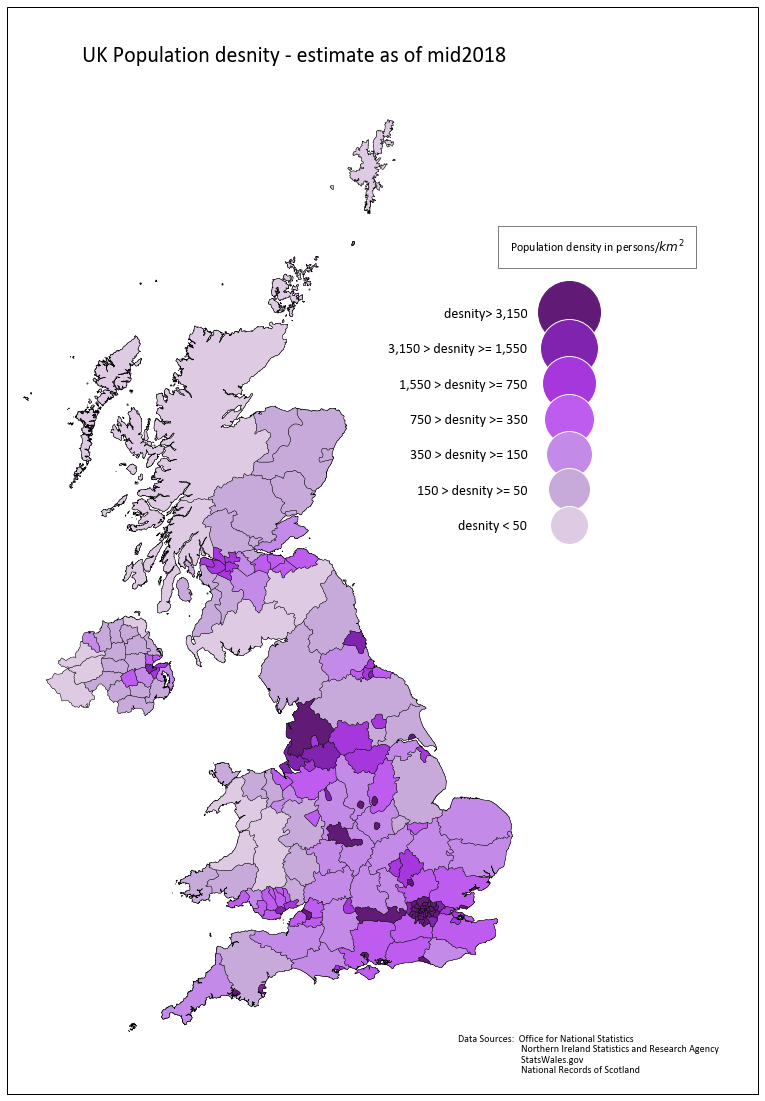

In [22]:
#plot the map of UK population density
from matplotlib.lines import Line2D


fig = plt.figure(figsize=(15,20))
ax=plt.axes(projection=ccrs.Mercator())
ax.set_extent([-9, 7, 49, 62])

facecolor11=(0.870588,0.796078,0.890196)
facecolor12=(0.7803921,0.666666,0.854901)
facecolor13=(0.764705,0.545098,0.905882)
facecolor14=(0.741176,0.360784,0.933333)
facecolor15=(0.650980,0.215686,0.866666)
facecolor16=(0.501960,0.137254,0.686274)
facecolor17=(0.380392,0.105882,0.466666)


ax.add_geometries(reader.geometries() ,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=(1,1,1))
ax.add_geometries(col11,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=facecolor11)
ax.add_geometries(col12,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=facecolor12) 
ax.add_geometries(col13,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=facecolor13) 
ax.add_geometries(col14,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=facecolor14) 
ax.add_geometries(col15,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=facecolor15) 
ax.add_geometries(col16,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=facecolor16) 
ax.add_geometries(col17,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=facecolor17) 

plt.text(0.1, 0.95, 'UK Population desnity - estimate as of mid2018',fontname='Calibri', fontsize=22,transform=ax.transAxes)
plt.text(0.6, 0.01, """Data Sources:  Office for National Statistics
                            Northern Ireland Statistics and Research Agency
                            StatsWales.gov
                            National Records of Scotland
""",fontname='Calibri', fontsize=10,transform=ax.transAxes)


ax2 = plt.axes([0.55,0.5,0.2,0.2])
ax2.set_axis_off()

legend_elements = [Line2D([0], [0], marker='o', color=facecolor17, label='desnity> 3,150', markerfacecolor=facecolor17, markersize=62),
                  Line2D([0], [0], marker='o', color='w', label='3,150 > desnity >= 1,550',markerfacecolor=facecolor16, markersize=58),
                  Line2D([0], [0], marker='o', color='w', label='1,550 > desnity >= 750',markerfacecolor=facecolor15, markersize=54),
                  Line2D([0], [0], marker='o', color='w', label='750 > desnity >= 350',markerfacecolor=facecolor14, markersize=50),
                  Line2D([0], [0], marker='o', color='w', label='350 > desnity >= 150',markerfacecolor=facecolor13, markersize=46),
                  Line2D([0], [0], marker='o', color='w', label='150 > desnity >= 50',markerfacecolor=facecolor12, markersize=42),
                  Line2D([0], [0], marker='o', color='w', label='desnity < 50',markerfacecolor=facecolor11, markersize=38)]

ax2.legend(handles=legend_elements,bbox_to_anchor=(0.8, 0.9),labelspacing=1.6, markerfirst=False,
           frameon=False, handletextpad=2, prop={'family': 'Calibri', 'size':14})
ax2.text(0.4,1.05, 'Population density in persons/$km^2$', fontname='Calibri', fontsize=12,
         color='black',bbox=dict(facecolor='none',linewidth= '0.5', edgecolor='black', boxstyle='square,pad=1'))


plt.savefig(fname=r"C:\Users\con74781\Desktop\Digital Projects\Python corona virus project\UK_population_density_map_mid2018",format='png',dpi=500)
plt.show()


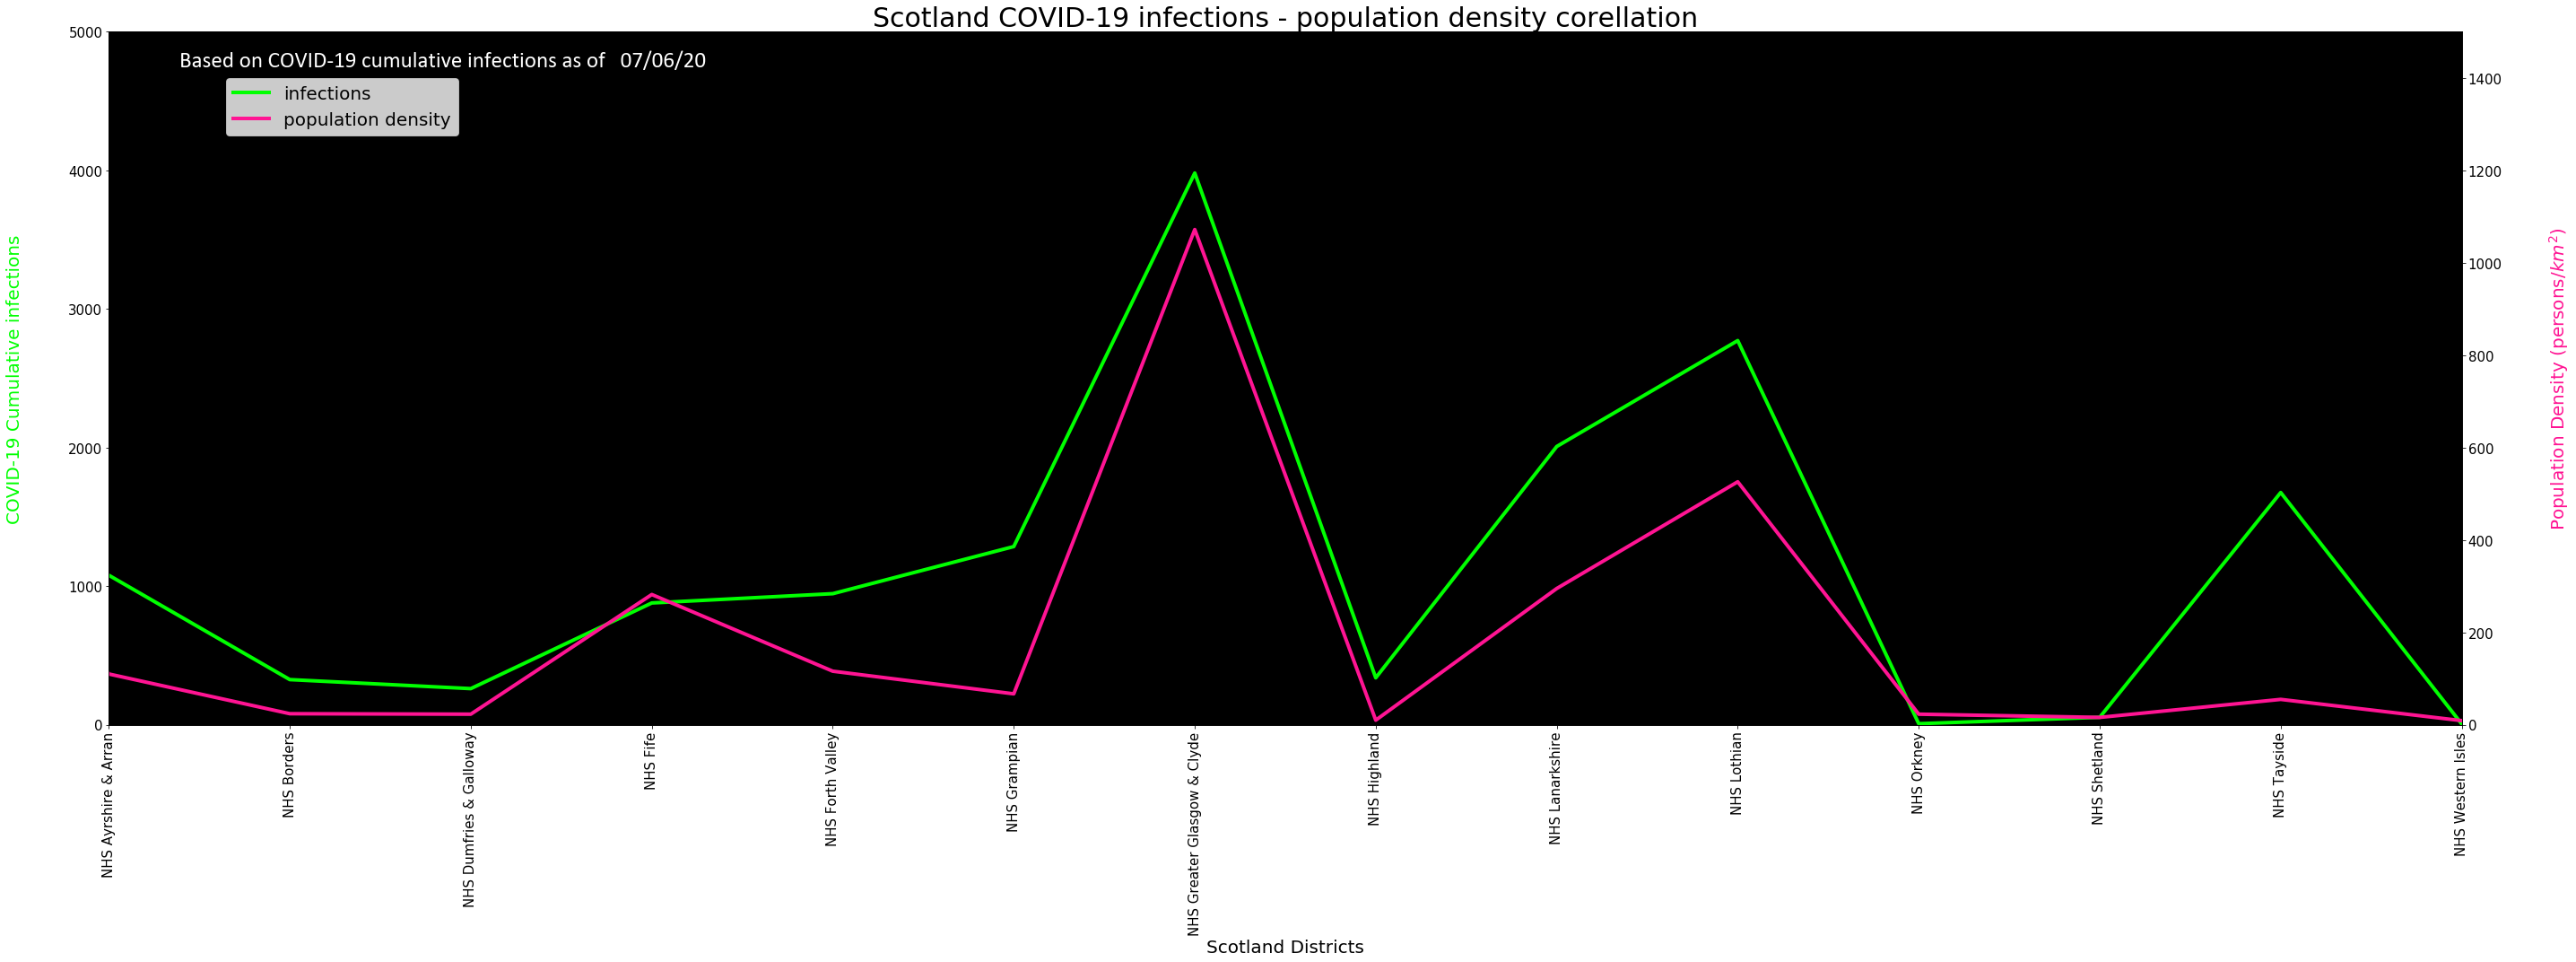

In [416]:
import numpy as np
import matplotlib.pyplot as plt


#find all xlabels and yvalues

#ENGLAND
xlabelsEN=[]
yvaluesEN_den=[]
yvaluesEN_inf=[]
cn=0
for i in range(0,len(Dict_boroughs_EN)):
    xlabelsEN.append(Dict_boroughs_EN["Boroughs_"+str(cn)][4])
    yvaluesEN_inf.append(Dict_boroughs_EN["Boroughs_"+str(cn)][2])
    cn+=1

cn=0
for i in range(0,len(Dict_EN_density)):
    if isinstance(Dict_EN_density["County_Density_"+str(cn)][2],int):
        yvaluesEN_den.append(Dict_EN_density["County_Density_"+str(cn)][2])
    else:
        yvaluesEN_den.append(Dict_EN_density["County_Density_"+str(cn)][4])
    cn+=1
    
    
    
#SCOTLAND    
xlabelsSC=[]
yvaluesSC_den=[]
yvaluesSC_inf=[]
cn=0
for i in range(0,len(Dict_SC_density)):
    xlabelsSC.append(Dict_SC_density["County_Density_"+str(cn)][2])
    yvaluesSC_den.append(Dict_SC_density["County_Density_"+str(cn)][4])
    cn+=1
    
cn=0
for i in range(0,len(Dict_boroughs_SC)):
    yvaluesSC_inf.append(Dict_boroughs_SC["Boroughs_"+str(cn)][2])
    cn+=1

    
#WALES
xlabelsWA=[]
yvaluesWA_den=[]
yvaluesWA_inf=[]
cn=0
for i in range(0,len(Dict_WA_density)):
    xlabelsWA.append(Dict_WA_density["County_Density_"+str(cn)][0])
    yvaluesWA_den.append(Dict_WA_density["County_Density_"+str(cn)][2])
    cn+=1    

cn=0
for i in range(0,len(Dict_boroughs_WA)):
    yvaluesWA_inf.append(Dict_boroughs_WA["Boroughs_"+str(cn)][2])
    cn+=1
    


XLabels= xlabelsEN + xlabelsSC + xlabelsWA
YVal_INF= yvaluesEN_inf + yvaluesSC_inf + yvaluesWA_inf    
YVal_DEN= yvaluesEN_den + yvaluesSC_den + yvaluesWA_den


#Plot the graph
fig = plt.figure(figsize=(40,15))
ax = fig.add_subplot(111)

ln1 = ax.plot(XLabels, YVal_INF, '-', label = 'infections',color='lime',linewidth=4.0)
plt.xticks(rotation=90)
ax2 = ax.twinx()
ln2 = ax2.plot(XLabels, YVal_DEN, '-r', label = 'population density',color='deeppink',linewidth=4.0)


line1, label1=ax.get_legend_handles_labels()
line2, label2=ax2.get_legend_handles_labels()

lines1_2=line1+line2
labels1_2=label1+label2
ax.legend(lines1_2, labels1_2, loc=[0.05,0.85],prop={'size': 20})

ax.set_xlabel("Scotland Districts",fontsize=20)
ax.set_ylabel(r"COVID-19 Cumulative infections", fontsize=20,labelpad=50,color='lime')
ax.tick_params(labelsize=15)
ax2.set_ylabel(r"Population Density (persons/$km^2$)",fontsize=20, labelpad=50,color='deeppink')
ax2.tick_params(labelsize=15)
ax.set_facecolor('k')
#ax.set_xlim('Barking and Dagenham','York') # Turn on only when monitoring England
#ax.set_xlim('Isle of Anglesey','Wrexham') # Turn on only when monitoring Wales
ax.set_xlim('NHS Ayrshire & Arran','NHS Western Isles')  # Turn on only when monitoring Scotland

ax.set_ylim(0,5000) # Change for COVID-19 infections limits
ax2.set_ylim(0,1500) # Change for population density limits

plt.text(0.03, 0.95, 'Based on COVID-19 cumulative infections as of   07/06/20',fontname='Calibri', fontsize=25,color='w',transform=ax.transAxes)
plt.title("Scotland COVID-19 infections - population density corellation",fontsize=30)
fig.tight_layout()
plt.savefig(fname=r"C:\Users\con74781\Desktop\Digital Projects\Python corona virus project\UK_population_density_infections_graph", dpi=100)

plt.show()

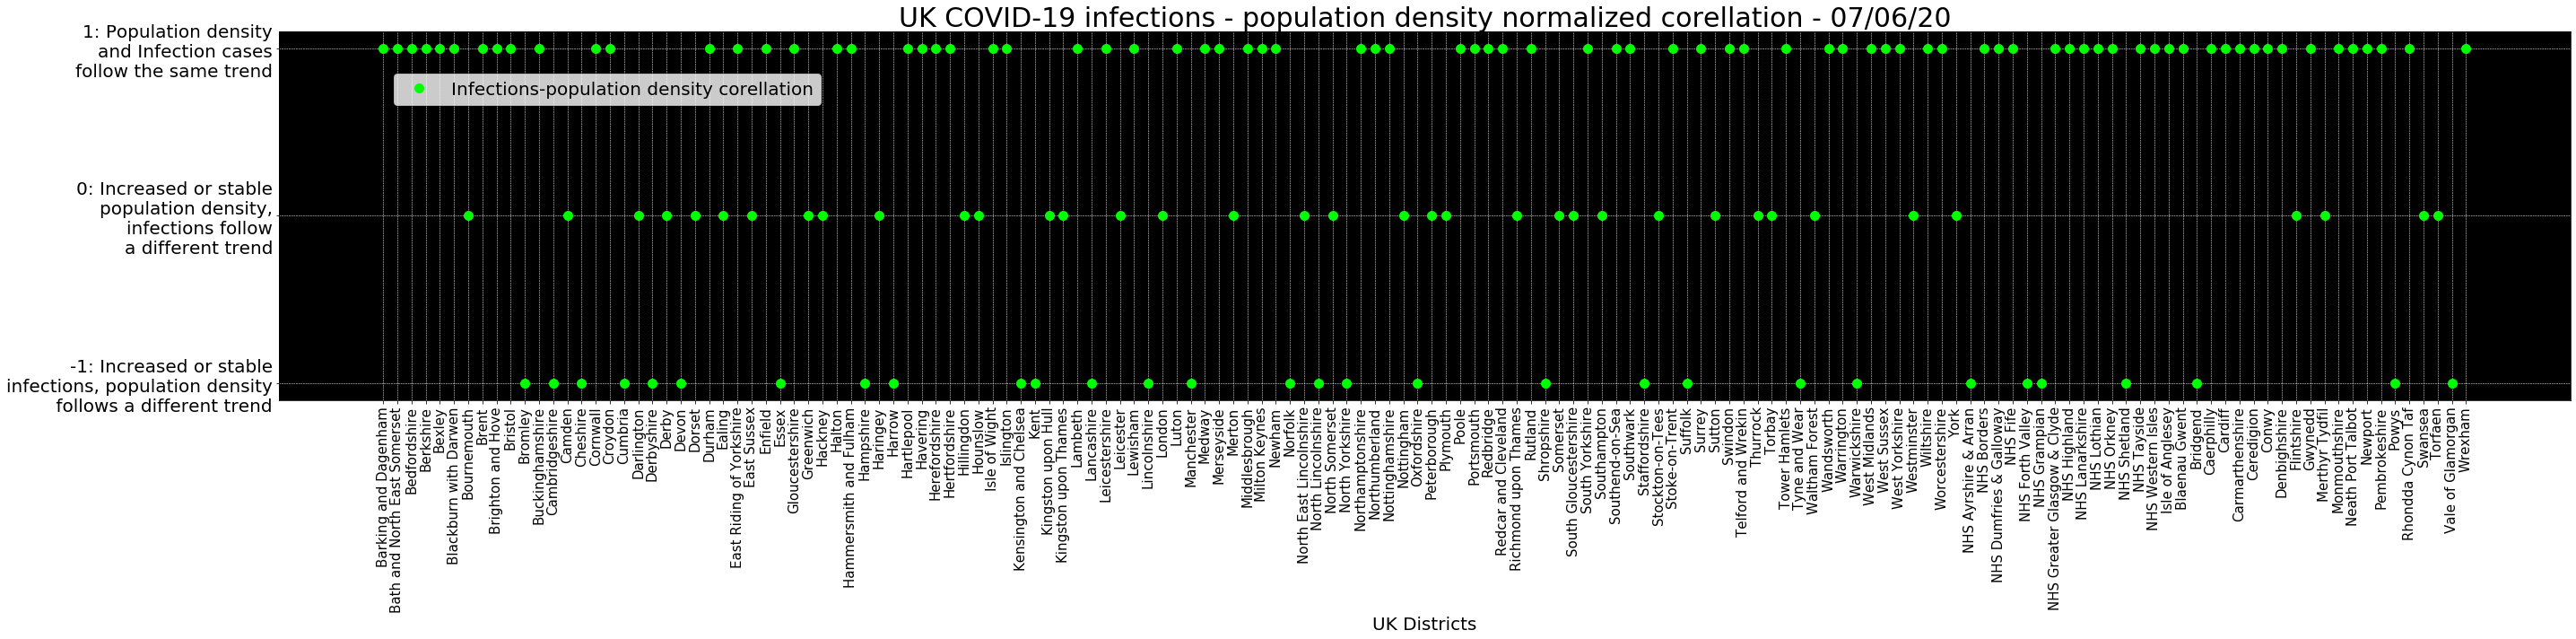

In [418]:
#Plot graph to show clearer the corellation between population density and infections numbers
#Graph to show "1" when both infections and population density follow the same trend (upward or downward or stable)
#Graph to show "0" when with increased or stable population density the infections follow a downward trend
#Graph to show "-1" when with increased or stable infections the population density follows a downward trend


indexes=[]
indexes.append(1)
up=0; down =0
opps=0; stbl = 0

for i in range(1,len(YVal_DEN)):
    
    if ((YVal_DEN[i] > YVal_DEN[i-1]) and (YVal_INF[i] > YVal_INF[i-1])):
        up+=1
        indexes.append(1)
    elif ((YVal_DEN[i] < YVal_DEN[i-1]) and (YVal_INF[i] < YVal_INF[i-1])):
        down+=1
        indexes.append(1)
    elif ((YVal_DEN[i] == YVal_DEN[i-1]) and (YVal_INF[i] == YVal_INF[i-1])):
        stbl+=1
        indexes.append(indexes[i-1])
    elif ((YVal_DEN[i] > YVal_DEN[i-1]) and (YVal_INF[i] < YVal_INF[i-1])) or ((YVal_DEN[i] == YVal_DEN[i-1]) and (YVal_INF[i] < YVal_INF[i-1])):
        opps+=1
        indexes.append(0)
    elif (YVal_DEN[i] == YVal_DEN[i-1]) and (YVal_INF[i] > YVal_INF[i-1]):
        indexes.append(0)    
        opps+=1
    elif ((YVal_DEN[i] < YVal_DEN[i-1]) and (YVal_INF[i] > YVal_INF[i-1])) or ((YVal_DEN[i] < YVal_DEN[i-1]) and (YVal_INF[i] == YVal_INF[i-1])):
        opps+=1
        indexes.append(-1)
    elif ((YVal_DEN[i] > YVal_DEN[i-1]) and (YVal_INF[i] == YVal_INF[i-1])):
        indexes.append(-1)
        opps+=1

corr1=0; corr0=0; corrmin1=0;
for entry in indexes:
    if entry==1:
        corr1+=1
    elif entry==0:
        corr0+=1
    else:
        corrmin1+=1

        
    
#Plot the graph
fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(111)

ln1 = ax.plot(XLabels, indexes, 'o', label = 'Infections-population density corellation',color='lime',markersize=10)
plt.xticks(rotation=90)

ax.legend(loc=[0.05,0.8],prop={'size': 20})

ax.set_xlabel("UK Districts",fontsize=20)
ax.tick_params(labelsize=15)
ax.set_facecolor('k')




plt.title("UK COVID-19 infections - population density normalized corellation - 07/06/20",fontsize=30)

plt.grid(color='w',linewidth=0.5,linestyle='--')
plt.yticks(np.arange(-1, 1.1, step=1),labels=['-1: Increased or stable\ninfections, population density\n follows a different trend','0: Increased or stable\npopulation density,\ninfections follow\na different trend',
                                              '1: Population density\nand Infection cases\nfollow the same trend'],size=20)


fig.tight_layout()
plt.savefig(fname=r"C:\Users\con74781\Desktop\Digital Projects\Python corona virus project\UK_population_density_infections_normalised_corellation", dpi=100)

plt.show()



In [424]:
#Calculate the Pearson's correlation co-efficient 


# 17/03/20, up = 49, down = 44, opps = 54, stbl = 0, Pcoeff = 0.415
# 08/04/20, up = 54, down = 42, opps = 51, stbl = 0, Pcoeff = 0.116
# 09/05/20 , up = 42, down = 34, opps = 71, stbl = 0, Pcoeff = -0.0471
# 07/06/20, up = 43, down = 37, opps = 67, stbl = 0, Pcoeff = -0.0471




Variables_product = []
YVal_INF_squared = [x**2 for x in YVal_INF] #calculate Χ^2
YVal_DEN_squared = [x**2 for x in YVal_DEN] #calculate Υ^2


SUM_X=sum(YVal_INF)
SUM_Y=sum(YVal_DEN)
SUM_X2=sum(YVal_INF_squared)
SUM_Y2=sum(YVal_DEN_squared)
n=len(YVal_INF)

# calculate XY
for i in range(0,len(YVal_DEN)):
    Variables_product.append(YVal_DEN[i]*YVal_INF[i])
   
SUM_XY=sum(Variables_product)    

P_coef = ( (n*SUM_XY) - (SUM_X*SUM_Y) ) / ((  (n*SUM_X2-SUM_X**2)*(n*SUM_Y2-SUM_Y**2)  ) **0.5)
P_coef


-0.03800893793752642

In [ ]:
up


In [426]:
down

37

In [427]:
opps

67

In [428]:
stbl

0

In [36]:
from PIL import Image
import PIL

im = Image.open(r"C:\Users\con74781\Desktop\Digital Projects\Python corona virus project\UK_population_density_map_mid2018.png")
im = im.convert("RGB")
im.save(r"C:\Users\con74781\Desktop\Digital Projects\Python corona virus project\UK_population_density_map_mid2018.jpg")